##Day 48 - DIY Solution

**Q1. Problem Statement: Principal Component Analysis(PCA)**

Load the "vehicle.csv" dataset into a DataFrame and perform the following
tasks:
1.	Find out the null values in the DataFrame and drop them using dropna()
function
2.	Considering the "class" column as the target variable/column, separate the target 
and the feature vectors
3.	Scale the numeric data in the independent variables (Feature vectors) using the Standard scalar
4.	Convert the independent variables into 2-D data using PCA (Principal Component Analysis)
5.	Combine the target data with the 2-D independent data/feature vectors to create final DataFrame
6.	Plot the final DataFrame using a scatter plot
7.	Calculate the variance ratio of the 2-D data converted using PCA


**Step-1:** Importing the required libraries and loading the dataset into a DataFrame.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/content/vehicle.csv')  
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


**Step-2:** Finding the null values in the DataFrame and deleting them.

In [ ]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [ ]:
df = df.dropna(how='any',axis=0) 
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

**Step-3:** Separating the target varibale and the feaure vectors.

In [ ]:
X = df.iloc[:, :-1]
X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


In [ ]:
y = df['class'] #seprarting class attribute. 
y.head()

0    van
1    van
2    car
3    van
4    bus
Name: class, dtype: object

**Step-4:** Scaling the numerical data from feature vectors using standard scaler.

In [ ]:
from sklearn.preprocessing import StandardScaler
#We transform (centralize) the entire X (independent variable data) to normalize it using standardscalar through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X) 
X_std  

array([[ 0.16323063,  0.52040788,  0.06066872, ...,  0.37128716,
        -0.3218087 ,  0.17183708],
       [-0.32287376, -0.61912319,  0.12406675, ...,  0.14710858,
         0.00340009,  0.44231829],
       [ 1.2569655 ,  0.84598818,  1.51882349, ..., -0.41333788,
        -0.1592043 ,  0.03659647],
       ...,
       [ 1.5000177 ,  1.49714879,  1.20183332, ..., -0.97378433,
        -0.3218087 ,  0.7127995 ],
       [-0.93050425, -1.43307395, -0.25632145, ...,  1.38009078,
         0.16600449, -0.09864413],
       [-1.05203035, -1.43307395, -1.01709784, ...,  0.59546574,
        -0.4844131 , -0.77484716]])

**Step-5:** Converting the independent data/feature vectors into 2-D data using PCA.

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-55.671834,12.345821
1,-115.331883,-9.704408
2,213.150742,7.118451
3,-139.616617,19.753569
4,-96.743351,53.427448


**Step-5:** Combining the target data with the 2-D data independent data/feature vectors to create final DataFrame.

In [ ]:
finalDf = pd.concat([principalDf, df[['class']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,class
0,-55.671834,12.345821,van
1,-115.331883,-9.704408,van
2,213.150742,7.118451,car
3,-139.616617,19.753569,van
4,-96.743351,53.427448,bus


**Step-6:** Plotting the final DataFrame using a scatter plot.

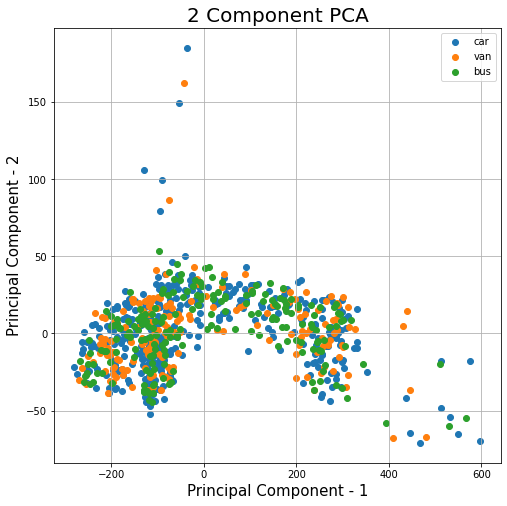

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component - 1', fontsize = 15)
ax.set_ylabel('Principal Component - 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
targets = ['car','van','bus']
colors = ['red', 'green', 'blue']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2'])
ax.legend(targets)
ax.grid()

**Step-7:** Calculating variance ratio of the 2-D data converted usuing PCA.

In [ ]:
pca.explained_variance_ratio_

array([0.95860865, 0.01804379])